# Data Visualization Using Python

Data yang digunakan adalah data train.csv yang diambil dari https://www.kaggle.com/prachi13/customer-analytics


Pada kesempatan ini, akan dilakukan penyampaian informasi dari data kepada Lead Manajer Shipping dengan tujuan untuk mendapat informasi agar pengambilan keputusan selanjutnya lebih obyektif.

## Mengkoneksikan Colab dengan Gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Import Packages

In [1]:
!pip install plotly==4.14.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 41.5 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [2]:
# Import package
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

## Setting Path

In [ ]:
# Load the data
path_data = '/content/'

# Check Directory
os.listdir(path_data)

['.config', 'Train (1).csv', 'sample_data']

## Menggunakan Pandas dengan Seaborn

In [3]:
# Membaca / import data .csv
df = pd.read_csv('Train (1).csv')

In [4]:
# Menampilkan dataframe
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:
# Menampilkan list nama-nama kolom
list(df)

['ID',
 'Warehouse_block',
 'Mode_of_Shipment',
 'Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Product_importance',
 'Gender',
 'Discount_offered',
 'Weight_in_gms',
 'Reached.on.Time_Y.N']

In [ ]:
# Mengetahui informasi kelengkapan dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Tidak terdapat missing value dalam data.

## Visualisasi Data

#### Bar Chart - Count Plot

Bar Chart digunakan untuk menunjukkan frekuensi atau nilai kuantitatif lainnya seperti rata-rata, jumlah, persentase dari data kategorik.

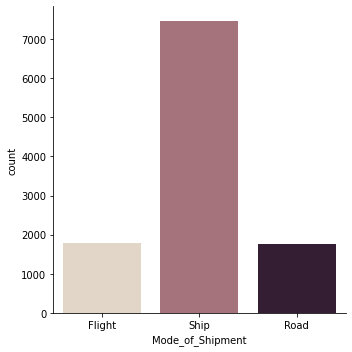

In [6]:
# visualisasi banyaknya tiap mode pengiriman
sns.catplot(x="Mode_of_Shipment", kind="count", palette="ch:.25", data=df)
plt.show()

> Cara pengiriman yang paling banyak digunakan adalah dengan ship.

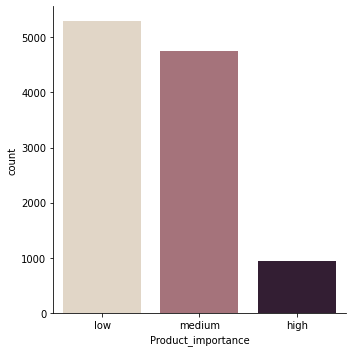

In [ ]:
# visualisasi banyaknya tiap jenis kepentingan barang
sns.catplot(x="Product_importance", kind="count", palette="ch:.25", data=df)
plt.show()

> Dari data, produk yang paling penting tercatat paling sedikit.

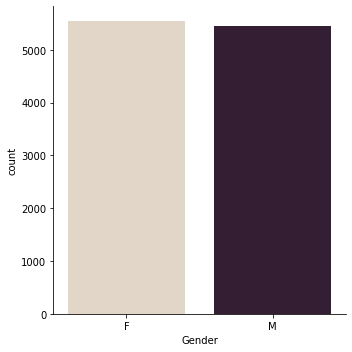

In [ ]:
# visualisasi Jenis Kelamin Customer
sns.catplot(x="Gender", kind="count", palette="ch:.25", data=df)
plt.show()

> Baik customer laki-laki atau perempuan memiliki proporsi yang hampir sama.

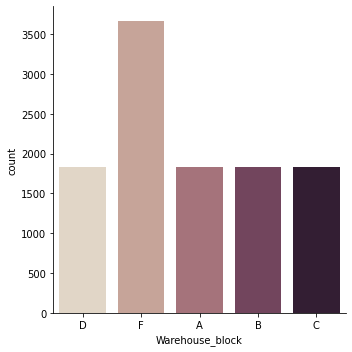

In [ ]:
# visualisasi Tiap warehouse
sns.catplot(x="Warehouse_block", kind="count", palette="ch:.25", data=df)
plt.show()

> Warehouse yang paling banyak melakukan pengiriman adalah warehouse F

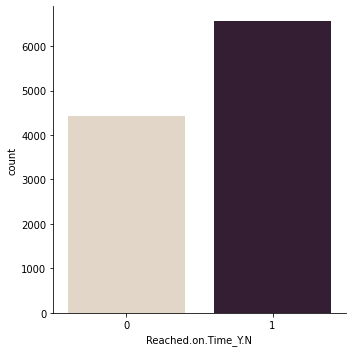

In [ ]:
# visualisasi Reached on Time
sns.catplot(x="Reached.on.Time_Y.N", kind="count", palette="ch:.25", data=df)
plt.show()

> Produk yang diterima tidak on time lebih banyak terjadi daripada barang yang sampai on time.

### Cross analysis


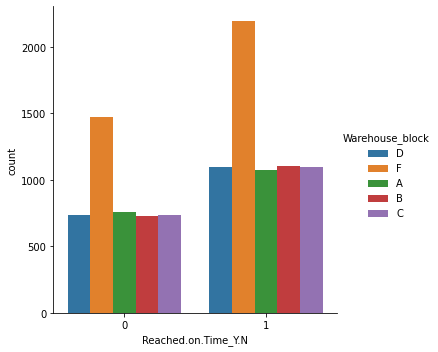

In [ ]:
sns.catplot(x="Reached.on.Time_Y.N", hue='Warehouse_block', kind="count", data=df)

Pola pengiriman tiba tepat waktu dan tidak tepat waktu berdasarkan kategori Warehouse_block tidak menunjukkan perbedaan yang signifikan.

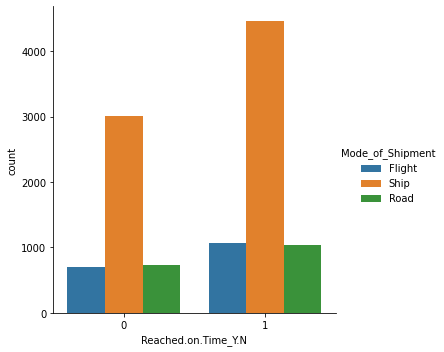

In [ ]:
sns.catplot(x="Reached.on.Time_Y.N", hue='Mode_of_Shipment', kind="count", data=df)

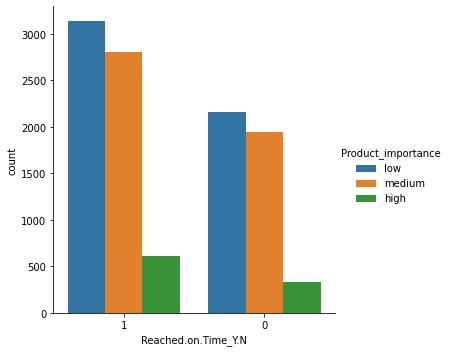

In [ ]:
sns.catplot(x="Reached.on.Time_Y.N", hue='Product_importance', kind="count", data=df)

#### Box Plot

Box plot digunakan untuk mengetahu penyebaran data. Ada banyak informasi yang kita dapatkan dari box plot yaitu nilai minimum, nilai maksimum, quartil pertama, median (quartil kedua), kuartil ketiga, dan outliers.

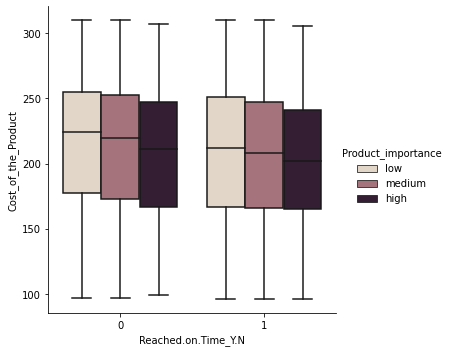

In [ ]:
# Visualisasi menggunakan seaborn
# visualisasi sebaran total volume setiap tahun berdasarkan type
sns.catplot(x="Reached.on.Time_Y.N", 
            y="Cost_of_the_Product", 
            hue="Product_importance", palette="ch:.25", kind="box", data=df)
plt.show()

> Cost of the product >< Porduct importance ternyata tidak begitu signifikan dalam memberikan dampak keterlambatan pengiriman.

In [8]:
df['Reached.on.Time_Y.N']=df['Reached.on.Time_Y.N'].astype(str)

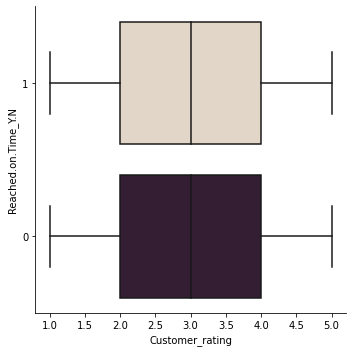

In [9]:
# Visualisasi menggunakan seaborn
# visualisasi sebaran reached on time dan customer rating
sns.catplot(y="Reached.on.Time_Y.N", 
            x="Customer_rating", 
            palette="ch:.25", kind="box", data=df)
plt.show()

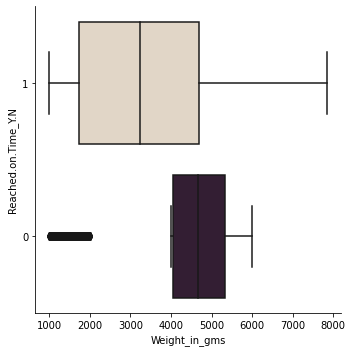

In [ ]:
# Visualisasi menggunakan seaborn
# visualisasi sebaran reached on time dan customer rating
sns.catplot(y="Reached.on.Time_Y.N", 
            x="Weight_in_gms", 
            palette="ch:.25", kind="box", data=df)
plt.show()

Barang ringan cenderung terlambat

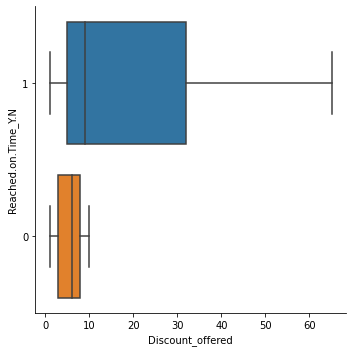

In [ ]:
# Visualisasi menggunakan seaborn
# visualisasi sebaran reached on time dan discount offer
sns.catplot(y="Reached.on.Time_Y.N", 
            x="Discount_offered", 
           kind="box", data=df)
plt.show()

Semakin promo barangnya, semakin terlambat nyampainya

#### Scatterplot

Scatterplot digunakan ketika ingin melihat relasi antara 2 variabel dan dari 2 variabel tersebut dapat diketahui variabel mana yang memiliki nilai yang lebih besar.

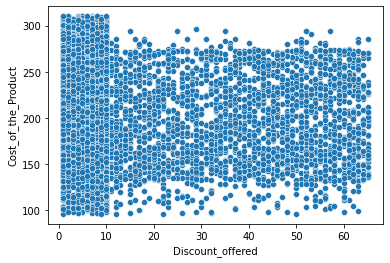

In [ ]:
# visualisasi hubungan variabel Discount_offered dan Cost_of_the_Product
sns.scatterplot(x="Discount_offered",
                y="Cost_of_the_Product",
                data = df)
plt.show()

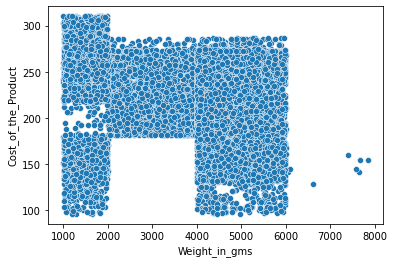

In [ ]:
# visualisasi hubungan variabel Discount_offered dan Cost_of_the_Product
sns.scatterplot(x="Weight_in_gms",
                y="Cost_of_the_Product",
                data = df)
plt.show()

> Total volume conventional lebih tinggi daripada total volume organik. Selain itu, rata-rata harga tipe organic tidak berhubungan linier terhadap total volume, semakin tinggi rata-rata harga tipe organic tidak menjadikan total volume semakin tinggi atau semakin rendah. Berbeda dengan tipe organic, rata-rata harga tipe convensional tampak mempengaruhi total volume.

### Line plot 

Line plot digunakan untuk melihat pergerakan data yang bernilai kontinu dari waktu ke waktu sehingga dapat dilihat juga trend-nya.

In [10]:
df2 = pd.read_csv("/content/avocado.csv")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17911 entries, 0 to 17910
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          17911 non-null  object 
 1   AveragePrice  17911 non-null  float64
 2   Total Volume  17911 non-null  float64
 3   4046          17911 non-null  float64
 4   4225          17911 non-null  float64
 5   4770          17911 non-null  float64
 6   Total Bags    17911 non-null  float64
 7   Small Bags    17911 non-null  float64
 8   Large Bags    17911 non-null  float64
 9   XLarge Bags   17911 non-null  float64
 10  type          17911 non-null  object 
 11  year          17911 non-null  int64  
 12  region        17911 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


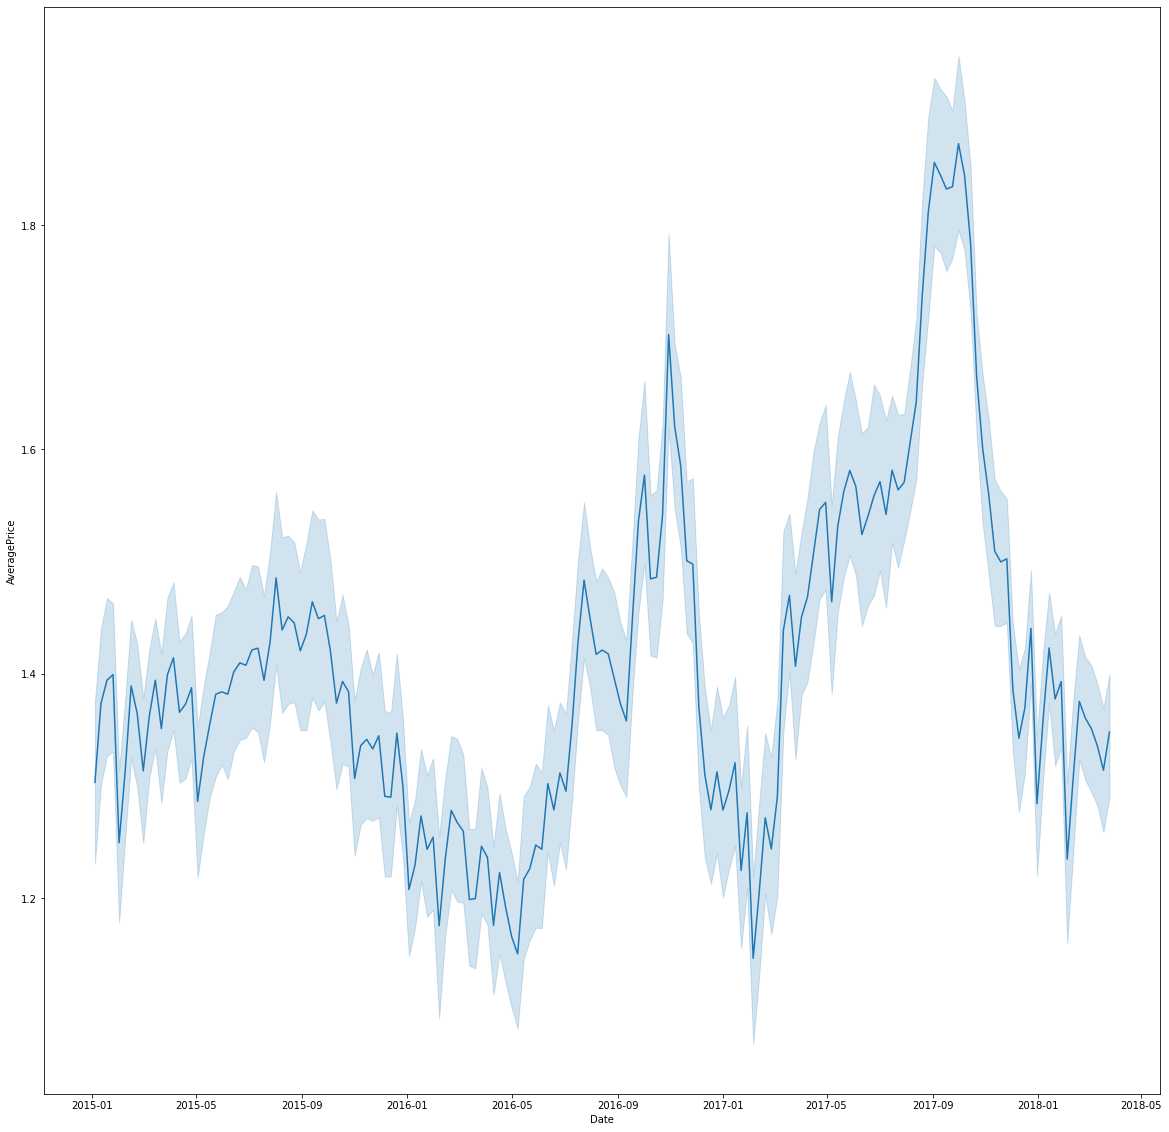

In [ ]:
# visualisasi line plot dengan default komponen
plt.figure(figsize=(20,20))
sns.lineplot(data=df2, x="Date", y="AveragePrice")
plt.show()

In [12]:
df2['Date'] = pd.to_datetime(df2['Date'])

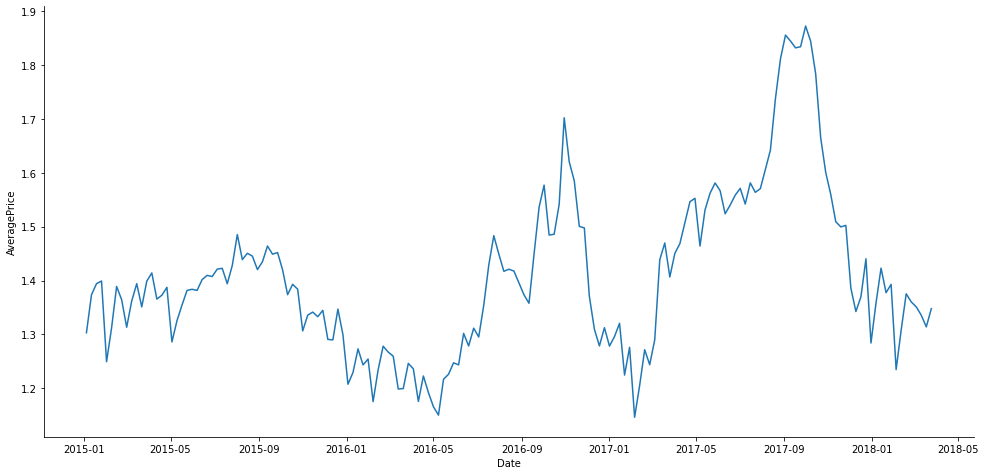

In [15]:
# visualisasi line chart dengan tanggal terlihat jelas di sumbu horizontal
g=sns.relplot(x="Date", y="AveragePrice", kind="line",data=df2, ci=None, height=3)
g.fig.set_size_inches(20,8)
# g.set_xticklabels(rotation=90)

In [ ]:
# Visualisasi menggunakan Plotly
data = df2.groupby('Date')['AveragePrice'].mean()
fig = px.line(
    x = data.index, 
    y = data.values, 
    title = 'Time Series with Range Slider and Selectors', 
    labels = {'y':'Average Price', 'x': 'Date'})

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    ))
fig.show()

> Pada setiap tahunnya, puncak harga tertinggi berada di akhir tahun dan kembali turun pada awal tahun. Rata-rata harga alpukat dari tahun 2015 hingga 2018 menunjukkan trend naik. 

### Stacked Bar Chart

Stacked Bar Chart digunakan untuk membandingkan banyak item dari kategori yang berbeda dan menunjukkan komposisi setiap item yang dibandingkan.

In [16]:
df2.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
# Grouping total small bags, large bags, dan xlarge bags berdasarkan type
data_group=df2.groupby('type')[['Small Bags', 'Large Bags', 'XLarge Bags']].sum()
data_group.reset_index(inplace=True)

In [ ]:
data_group

,type,Small Bags,Large Bags,XLarge Bags
0,conventional,1.981154e+09,5.771905e+08,35226891.85
1,organic,1.001559e+08,4.084097e+07,7054.94


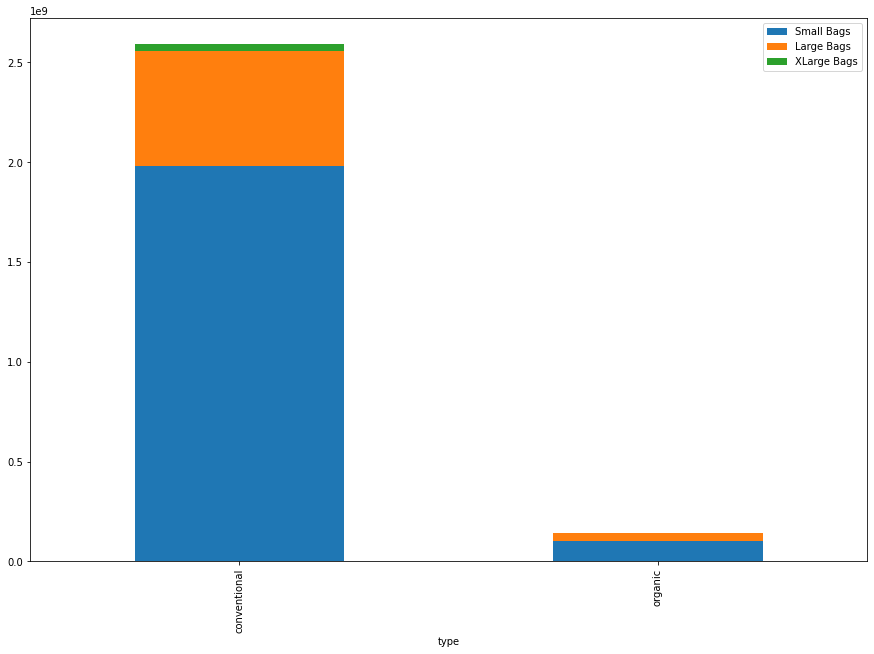

In [ ]:
# plot total small bags, large bags, dan xlarge bags pada masing-masing tipe
data_group.plot(kind = 'bar',figsize = (15,10), stacked = True, x='type')

> komposisi convensional di ketiga item (small bags, large bags, xlarge bags) lebih besar dibanding organic

### Pareto Chart

Pareto chart menunjukkan nilai kuantitatif dari data kategorik dengan menampilkannya secara terurut dari nilai tertinggi ke terendah. Selain itu juga menunjukkan persentase atau nilai kumulatif dari nilai kuantitatifnya.

In [ ]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [17]:
# menghitung rata-rata harga setiap warehouse
data_group_cat=df.groupby('Reached.on.Time_Y.N')['Discount_offered'].mean()

In [18]:
data_group_cat

Reached.on.Time_Y.N
0     5.545987
1    18.663721
Name: Discount_offered, dtype: float64

In [19]:
df_data_group_cat = data_group_cat.reset_index()
df_data_group_cat

,Reached.on.Time_Y.N,Discount_offered
0,0,5.545987
1,1,18.663721


In [20]:
# menghitung persentase kumulatif dari Cost_of_the_Product
total_discount_offered = df_data_group_cat.Discount_offered.sum()
df_data_group_cat['percentage_Cost_of_the_discount'] = df_data_group_cat.Discount_offered/total_discount_offered
df_data_group_cat = df_data_group_cat.sort_values('percentage_Cost_of_the_discount', ascending = False)
df_data_group_cat['cumsum_pct'] = df_data_group_cat.percentage_Cost_of_the_discount.cumsum()
df_data_group_cat.index = df_data_group_cat['Reached.on.Time_Y.N'].values
# df_data_group_cat = df_data_group_cat[df_data_group_cat.cumsum_pct <= 0.98] # untuk memfilter 98% averageprice yang ingin ditampilkan
df_data_group_cat = df_data_group_cat
df_data_group_cat.head()

,Reached.on.Time_Y.N,Discount_offered,percentage_Cost_of_the_discount,cumsum_pct
1,1,18.663721,0.770919,0.770919
0,0,5.545987,0.229081,1.000000


<AxesSubplot:>

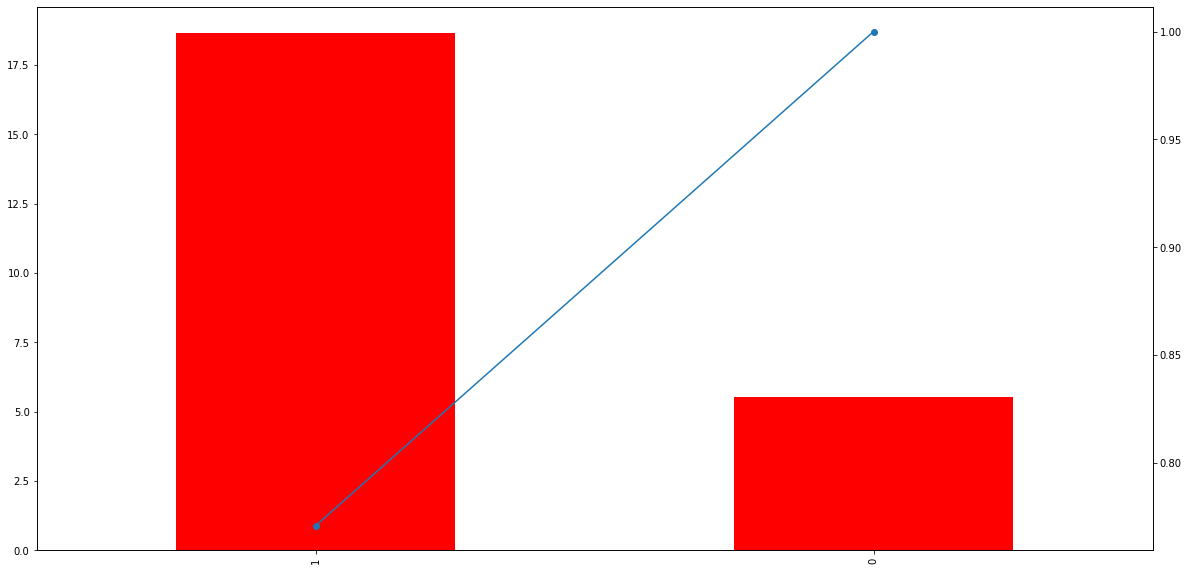

In [21]:
# visualisasi rata-rata harga alpukat pada setiap region
ax = df_data_group_cat.Discount_offered.plot(kind = 'bar',rot=90,color = 'r')
df_data_group_cat.cumsum_pct.plot(kind='line',
                                  linestyle='-',
                                  marker='o',figsize = (20,10),rot=90,secondary_y=True)

> Rata-rata cost tiap warehouse hampir sama, namun yang tertinggi adalah warehouse B.